In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Qchains
import plotly.graph_objects as go
from scipy.optimize import curve_fit
import cmath
import matplotlib.colors as mcolors

### Se Travelling state for the selected states used in this assignment. This is purely a trial and error file

## Travelling state in "fiber"

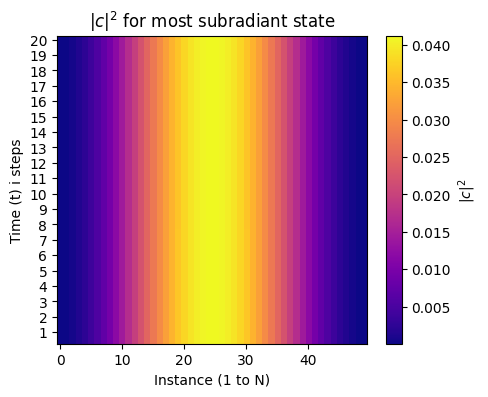

In [2]:
dipole_vector_hatx = np.array([0, 1, 0]) #in x retning
points50 = Qchains.ArrayGenerator(50)
d = 0.25
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points50, dipole_vector_hatx, d)

stop = 20
steps = 40
time = np.linspace(0, stop, steps)

most_subradiant_state = eig_vec_50[:, np.argmax(eig_val_50.real)]
Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, most_subradiant_state, time)

site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, most_subradiant_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower')

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')

# Compute tick positions in data index space
ticks_pos = np.linspace(1, steps - 1, stop, dtype=int)  # positions in array
ticks_labels = np.arange(1, stop + 1)     

plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels
plt.yticks(ticks_pos, ticks_labels)

plt.title('$|c|^2$ for most subradiant state')
plt.show()

## Trial and error for good state

[-0.25      +0.4330127j -0.70710678+0.j         0.25      -0.4330127j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         

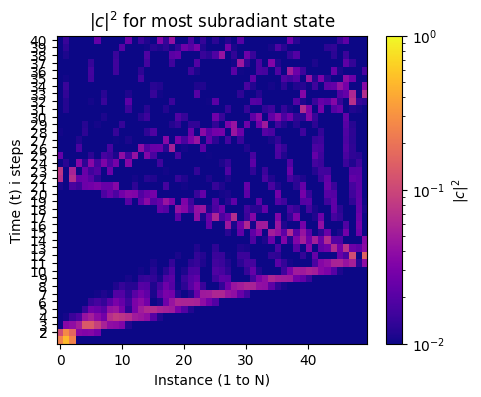

Text(0, 0.5, '$|c_i|^2$')

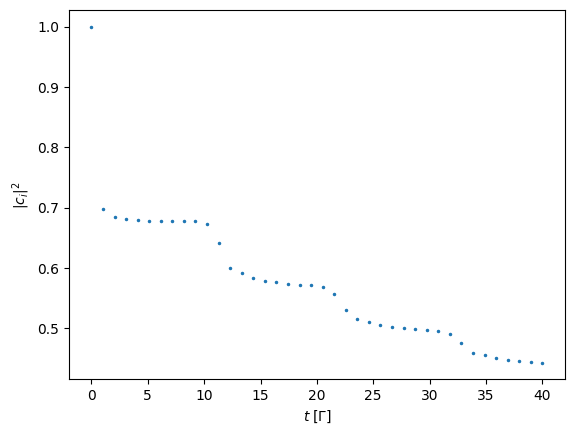

In [3]:
stop = 40
steps = 40
time = np.linspace(0, stop, steps)
d = 0.1
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points50, dipole_vector_hatx, d)


initial_state  = np.zeros(len(eig_vec_50), dtype=complex)
b = 0.5
initial_state[0] = b * np.exp(1j * (2*np.pi/3))
initial_state[1] = -np.sqrt(1-2*b**2)
initial_state[2] = -b * np.exp(1j * (2*np.pi/3))
print(initial_state)

norm = mcolors.LogNorm(vmin=1e-2, vmax=1)
site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, initial_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower', norm=norm)

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')

# Compute tick positions in data index space
ticks_pos = np.linspace(1, steps - 1, stop, dtype=int)  # positions in array
ticks_labels = np.arange(1, stop + 1)     

plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels
plt.yticks(ticks_pos, ticks_labels)

plt.title('$|c|^2$ for most subradiant state')
plt.show()

plt.plot(time, np.sum(site_prob_t, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')

[ 0.4472136+0.j -0.4472136+0.j  0.4472136+0.j -0.4472136+0.j
  0.4472136+0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j]


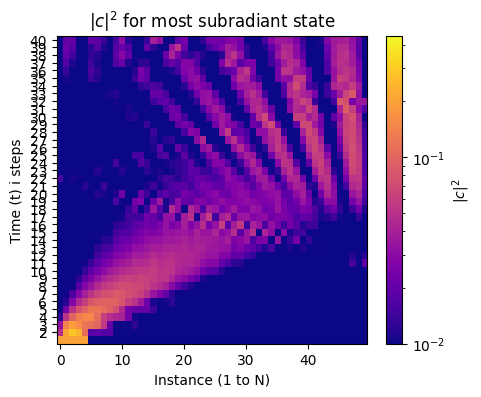

Text(0, 0.5, '$|c_i|^2$')

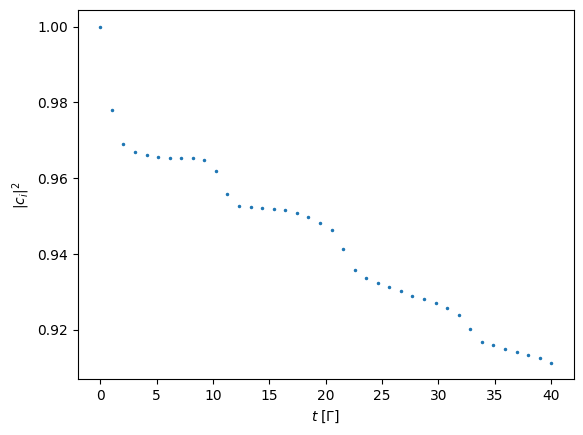

In [4]:
stop = 40
steps = 40
time = np.linspace(0, stop, steps)
d = 0.1
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points50, dipole_vector_hatx, d)


initial_state  = np.zeros(len(eig_vec_50), dtype=complex)
b = 0.3
initial_state[0] = np.sqrt(1/5)
initial_state[1] = -np.sqrt(1/5)
initial_state[2] = np.sqrt(1/5)
initial_state[3] = -np.sqrt(1/5)
initial_state[4] = np.sqrt(1/5)

print(initial_state)

norm = mcolors.LogNorm(vmin=1e-2, vmax=np.sqrt(1/5))
site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, initial_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower', norm=norm)

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')

# Compute tick positions in data index space
ticks_pos = np.linspace(1, steps - 1, stop, dtype=int)  # positions in array
ticks_labels = np.arange(1, stop + 1)     

plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels
plt.yticks(ticks_pos, ticks_labels)

plt.title('$|c|^2$ for most subradiant state')
plt.show()

plt.plot(time, np.sum(site_prob_t, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')

[-0.2236068 -0.38729833j  0.38729833+0.67082039j -0.2236068 +0.38729833j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j 

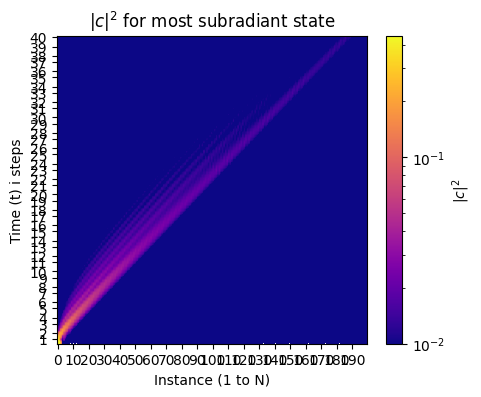

Text(0, 0.5, '$|c_i|^2$')

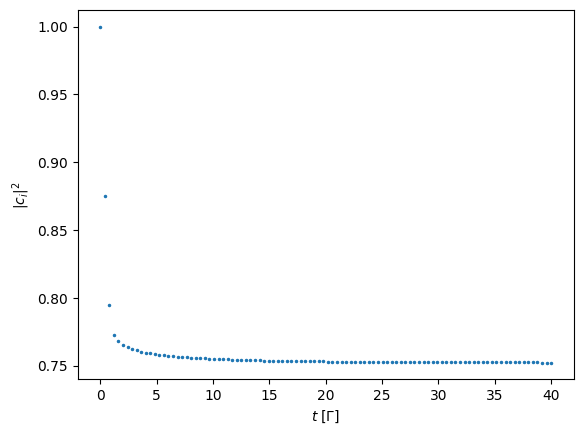

In [5]:
stop = 40
steps = 100
time = np.linspace(0, stop, steps)
points500 = Qchains.ArrayGenerator(200)
d = 0.1
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points500, dipole_vector_hatx, d)


initial_state  = np.zeros(len(eig_vec_50), dtype=complex)
b = 0.3
initial_state[0] = np.conj(np.sqrt(1/5) *  np.exp(-1j * (4*np.pi/3)))
initial_state[1] = -np.sqrt(3/5) * np.exp(-1j * (2*np.pi/3))
initial_state[2] = np.sqrt(1/5)  *  np.exp(1j * (2*np.pi/3))
# initial_state[3] = -np.sqrt(1/5)
# initial_state[4] = np.sqrt(1/5)

print(initial_state)

#norm = mcolors.LogNorm(vmin=1e-2, vmax=np.sqrt(4/6))
site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, initial_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower', norm=norm)

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')

# Compute tick positions in data index space
ticks_pos = np.linspace(1, steps - 1, stop, dtype=int)  # positions in array
ticks_labels = np.arange(1, stop + 1)     

plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels
plt.yticks(ticks_pos, ticks_labels)

plt.title('$|c|^2$ for most subradiant state')
plt.show()

plt.plot(time, np.sum(site_prob_t, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')

In [6]:
import numpy as np

N = 10  # for simplicity, use 10 sites
k0 = np.pi / 2  # momentum
initial_state = np.zeros(N, dtype=complex)

initial_state[:3] = [1, 1, 1]
phases = np.exp(1j * k0 * np.arange(N))

# Apply phases
initial_state *= phases
initial_state /= np.linalg.norm(initial_state)
print(np.round(initial_state, 4))

[ 0.5774+0.j      0.    +0.5774j -0.5774+0.j      0.    -0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    -0.j
  0.    +0.j      0.    +0.j    ]


[ 0.5774+0.j      0.    +0.5774j -0.5774+0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    

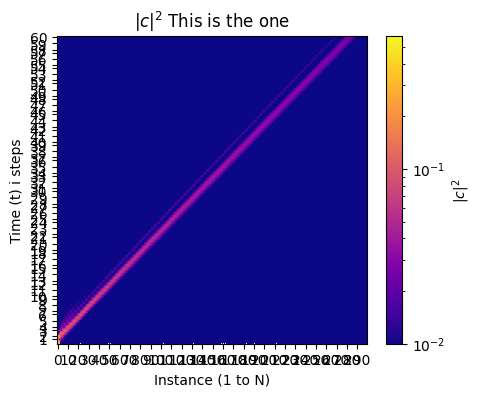

Text(0, 0.5, '$|c_i|^2$')

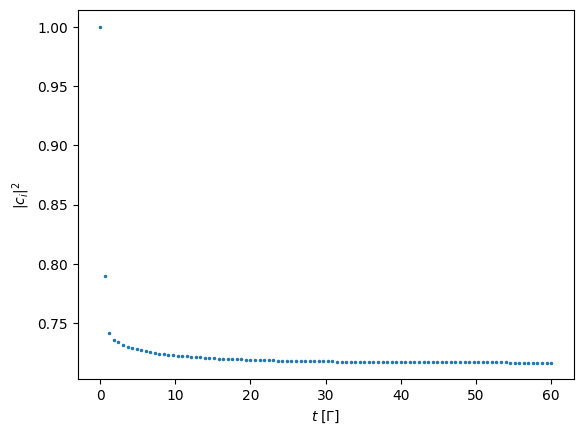

In [7]:
stop = 60
steps = 100
time = np.linspace(0, stop, steps)
points500 = Qchains.ArrayGenerator(300)
d = 0.1
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points500, dipole_vector_hatx, d)


initial_state  = np.zeros(len(eig_vec_50), dtype=complex)
b = 0.3
initial_state[0] = 0.5774+0j
initial_state[1] = +0.5774j
initial_state[2] = -0.5774+0.j
# initial_state[3] = -np.sqrt(1/5)
# initial_state[4] = np.sqrt(1/5)

print(initial_state)

norm = mcolors.LogNorm(vmin=1e-2, vmax=0.5774)
site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, initial_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower', norm=norm)

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')

# Compute tick positions in data index space
ticks_pos = np.linspace(1, steps - 1, stop, dtype=int)  # positions in array
ticks_labels = np.arange(1, stop + 1)     

plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels
plt.yticks(ticks_pos, ticks_labels)

plt.title('$|c|^2$ This is the one')
plt.show()

plt.plot(time, np.sum(site_prob_t, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')

In [8]:
import numpy as np

N = 10  # number of total sites
k0 = np.pi / 2  # wavevector (momentum)

initial_state = np.zeros(N, dtype=complex)
initial_state[:5] = [1, 1, 1, 1, 1]
phases = np.exp(1j * k0 * np.arange(N))
initial_state *= phases
initial_state /= np.linalg.norm(initial_state)

print(np.round(initial_state, 4))

[ 0.4472+0.j      0.    +0.4472j -0.4472+0.j     -0.    -0.4472j
  0.4472-0.j      0.    +0.j      0.    +0.j      0.    -0.j
  0.    +0.j      0.    +0.j    ]


[ 0.4472+0.j      0.    +0.4472j -0.4472+0.j     -0.    -0.4472j
  0.4472+0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
  0.    +0.j      0.

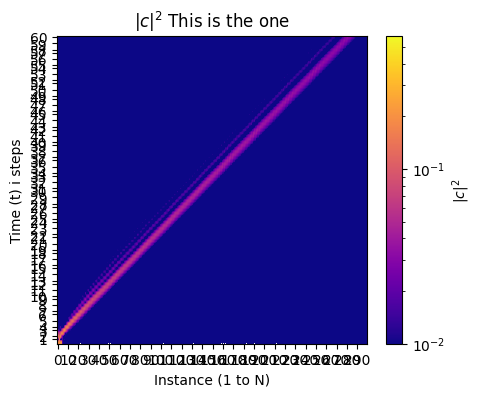

Text(0, 0.5, '$|c_i|^2$')

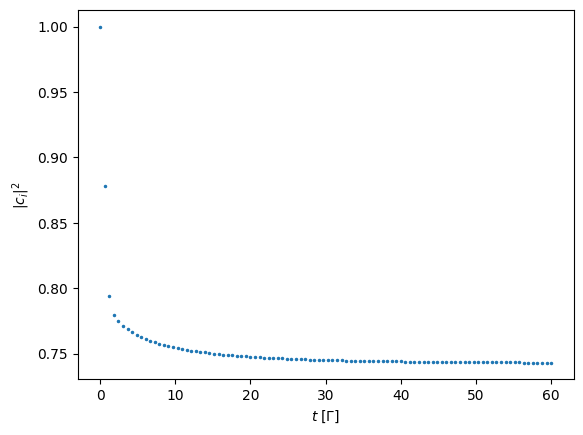

In [9]:
stop = 60
steps = 100
time = np.linspace(0, stop, steps)
points500 = Qchains.ArrayGenerator(300)
d = 0.1
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points500, dipole_vector_hatx, d)


initial_state  = np.zeros(len(eig_vec_50), dtype=complex)
b = 0.3
initial_state[0] = 0.4472+0.j
initial_state[1] = 0.    +0.4472j
initial_state[2] = -0.4472+0.j
initial_state[3] =   -0.    -0.4472j
initial_state[4] =  0.4472-0.j

print(initial_state)

norm = mcolors.LogNorm(vmin=1e-2, vmax=0.5774)
site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, initial_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower', norm=norm)

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')

# Compute tick positions in data index space
ticks_pos = np.linspace(1, steps - 1, stop, dtype=int)  # positions in array
ticks_labels = np.arange(1, stop + 1)     

plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels
plt.yticks(ticks_pos, ticks_labels)

plt.title('$|c|^2$ This is the one')
plt.show()

plt.plot(time, np.sum(site_prob_t, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')

In [10]:
import numpy as np

N = 200
center = 0
width = 1
k0 = np.pi / 2

sites = np.arange(N)
gaussian = np.exp(-(sites - center)**2 / (2 * width**2))
phases = np.exp(1j * k0 * sites)
initial_state = gaussian * phases
initial_state /= np.linalg.norm(initial_state)

# Clean up very small values
threshold = 1e-10
initial_state[np.abs(initial_state) < threshold] = 0
#initial_state

[ 8.49314375e-01+0.00000000e+00j  3.15429342e-17+5.15135208e-01j
 -1.14942201e-01+1.40763599e-17j -1.73318698e-18-9.43503045e-03j
  2.84913232e-04-6.97836155e-20j  9.69032429e-22+3.16510011e-06j
 -1.29350407e-08+4.75225687e-24j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

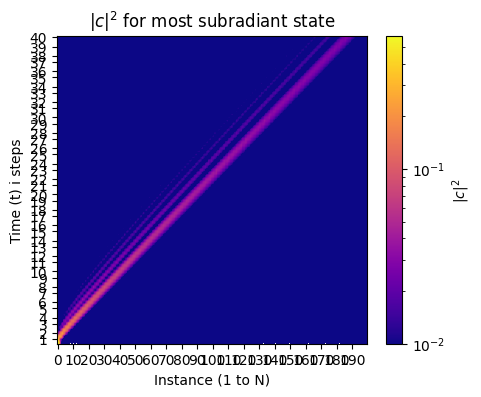

Text(0, 0.5, '$|c_i|^2$')

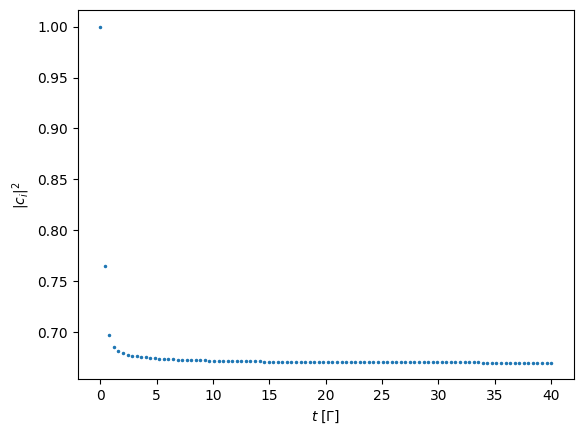

In [11]:
stop = 40
steps = 100
time = np.linspace(0, stop, steps)
points500 = Qchains.ArrayGenerator(200)
d = 0.1
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points500, dipole_vector_hatx, d)


print(initial_state)

#norm = mcolors.LogNorm(vmin=1e-2, vmax=np.sqrt(4/6))
site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, initial_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower', norm=norm)

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')

# Compute tick positions in data index space
ticks_pos = np.linspace(1, steps - 1, stop, dtype=int)  # positions in array
ticks_labels = np.arange(1, stop + 1)     

plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels
plt.yticks(ticks_pos, ticks_labels)

plt.title('$|c|^2$ for most subradiant state')
plt.show()

plt.plot(time, np.sum(site_prob_t, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')

In [12]:
import numpy as np

N = 300
k0 = np.pi / 2
width = 1.0   # narrow Gaussian
center = 1.0  # center around second site (index 1)

sites = np.arange(N)

# 1. Gaussian envelope
gaussian = np.exp(-(sites - center)**2 / (2 * width**2))

# 2. Plane wave for momentum
phases = np.exp(1j * k0 * sites)

# 3. Construct and normalize
initial_state = gaussian * phases
initial_state /= np.linalg.norm(initial_state)

# 4. Clean tiny values (optional)
initial_state[np.abs(initial_state) < 1e-12] = 0

# 5. Show result
print(np.round(initial_state, 9))


[ 4.57945133e-01+0.00000000e+00j  0.00000000e+00+7.55023882e-01j
 -4.57945133e-01+0.00000000e+00j -0.00000000e+00-1.02181371e-01j
  8.38755800e-03-0.00000000e+00j  0.00000000e+00+2.53282000e-04j
 -2.81400000e-06+0.00000000e+00j -0.00000000e+00-1.10000000e-08j
  0.00000000e+00-0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

[ 4.57945133e-01+0.00000000e+00j  4.62318790e-17+7.55023882e-01j
 -4.57945133e-01+5.60821042e-17j -1.87704133e-17-1.02181371e-01j
  8.38755769e-03-2.05435914e-18j  7.75453381e-20+2.53282296e-04j
 -2.81371214e-06+1.03374107e-21j -4.92877407e-24-1.14989984e-08j
  1.72880449e-11-8.46869955e-27j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

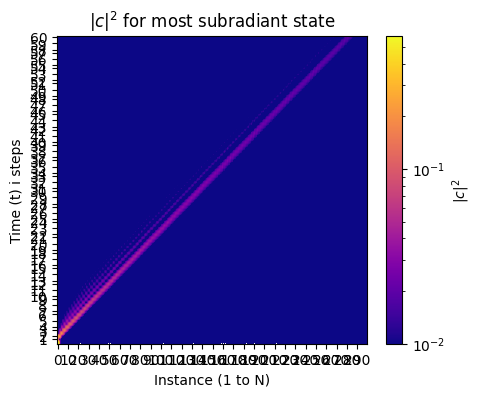

Text(0, 0.5, '$|c_i|^2$')

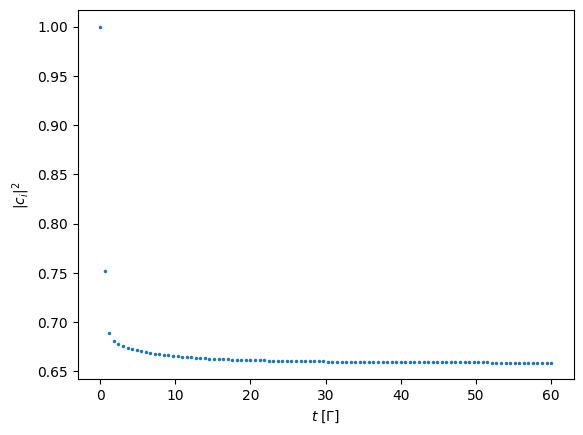

In [13]:
stop = 60
steps = 100
time = np.linspace(0, stop, steps)
points500 = Qchains.ArrayGenerator(300)
d = 0.1
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points500, dipole_vector_hatx, d)


print(initial_state)

#norm = mcolors.LogNorm(vmin=1e-2, vmax=np.sqrt(4/6))
site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, initial_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower', norm=norm)

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')

# Compute tick positions in data index space
ticks_pos = np.linspace(1, steps - 1, stop, dtype=int)  # positions in array
ticks_labels = np.arange(1, stop + 1)     

plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels
plt.yticks(ticks_pos, ticks_labels)

plt.title('$|c|^2$ for most subradiant state')
plt.show()

plt.plot(time, np.sum(site_prob_t, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')